# Data Preparation
The data preparation stage is undertaken to select, clean, construct, integrate and format the data at hand to prepare it for the Modelling stage

## Import Libraries
Prior to preparing the data, the necessary modules that will be utilised in this stage is first imported

In [304]:
import pandas as pd
import numpy as np
from scipy import stats
import array

import matplotlib.pyplot as plt
%matplotlib inline

import math
from math import sqrt as sq

import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

import seaborn as sns
sns.set(style = "white", color_codes = True)
sns.set(font_scale = 1.5)

from pathlib import Path

import warnings
warnings.filterwarnings('ignore')

## Import Dataset

Import the xlsx file containing heart disease dataset

In [305]:
# back to parent folder to access data files
path = Path('../dataset/Heart_dirty.xlsx')

# filename = 'Heart_dirty.xlsx'
# this function opens the spreadsheet file in a Pandas DataFrame with a 2 dimensional data structure
df = pd.read_excel(path)

# view the DataFrame
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,Male,Typical Angina,125,212,<=120mg/dl,ST-T Wave Abnormality,168,No,1.0,Downsloping,2,Reversible Defect,Normal
1,53,Male,TA,140,203,>120mg/dl,Normal,155,Yes,3.1,Upsloping,0,Reversible Defect,Normal
2,70,Male,Typical Angina,145,174,<=120mg/dl,ST-T Wave Abnormality,125,Yes,2.6,Upsloping,0,Reversible Defect,Normal
3,61,M,Typical Angina,148,203,<=120mg/dl,ST-T Wave Abnormality,161,No,0.0,Downsloping,1,Reversible Defect,Normal
4,62,F,TA,138,294,>120mg/dl,ST-T Wave Abnormality,106,No,1.9,Flat,3,Normal Blood Flow,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,Male,Atypical Angina,140,221,<=120mg/dl,ST-T Wave Abnormality,164,Yes,0.0,Downsloping,0,Normal Blood Flow,Heart Disease
1021,60,Male,Typical Angina,125,258,<=120mg/dl,Normal,141,Yes,2.8,Flat,1,Reversible Defect,Normal
1022,47,Male,TA,110,275,<=120mg/dl,Normal,118,Yes,1.0,Flat,1,Normal Blood Flow,Normal
1023,50,Female,Typical Angina,110,254,<=120mg/dl,Normal,159,No,0.0,Downsloping,0,Normal Blood Flow,Heart Disease


## Description of DataFrame df
Import the csv file containing the description of each field in the dataset

In [306]:
# this function opens the csv file in a Pandas DataFrame, also with a 2 dimensional data structure
description = pd.read_csv('../dataset/heart-glossary.csv')

# view the description DataFrame
description

,Column,Source,Description,Remarks
0,age,UCI Machine Learning Repository,Age of patient,Unit in Years
1,sex,UCI Machine Learning Repository,"Sex of the patient (Male, Female)",Male or Female
2,cp,UCI Machine Learning Repository,Chestpain Type,"Typical Angina (TA), Atypical Angina (ATA), No..."
3,tresbps,UCI Machine Learning Repository,Resting blood pressure (On admission to the ho...,Unit in mm Hg
4,chol,UCI Machine Learning Repository,Serum cholesterol,Unit in mm/dl
5,fbs,UCI Machine Learning Repository,Fasting blood sugar. More than 120mg/dl consid...,>120mg/dl or <=120mg/dl
6,restecg,UCI Machine Learning Repository,Resting electrocardiogram results,"Normal, ST-T wave abnormality, Left ventricula..."
7,thalach,UCI Machine Learning Repository,MaxHR: maximum heart rate achieved,Numeric value between 60 and 202
8,exang,UCI Machine Learning Repository,ExerciseAngina: exercise-induced angina,Yes or No
9,oldpeak,UCI Machine Learning Repository,ST depression induced by exercise relative to ...,Numeric value measured in depression


## 1) Data Selection

In selecting which data to include and exclude from the analysis, it was decided that the entire dataset should be included without omitting any rows due to the following reasons:

- Complete data / avoiding bias: The data at hand does not contain any empty cells which is ideal in this project as the bulk of the efforts can be directed to developing the right model instead of finding the best methods of imputation / deletion to deal with the missing values. By including the entire dataset, we are able to analyse the entire population and not just a subset. This also allows us to avoid potential biases and ensures that our analysis is based on a complete and representative sample

- Diversity of patients: The dataset contains information about patients with different characteristics such as age, sex, and types of chest pains among others. Including the entire population and not just a subset may allow us to identify trends and patters that may be missed if we used a smaller sample instead. Although there are inconsistencies with the data (e.g. "m", "M", "male", and "Male" being used to describe the male population), this can easily be cleaned prior to the Modelling stage

In [307]:
# complete data / avoiding bias
missingdata_percentage_bycolumn = df.isnull().sum()/len(df)
print(missingdata_percentage_bycolumn)
print()
missingdata_sum_bycolumn = df.isnull().sum()
print(missingdata_sum_bycolumn)

age         0.0
sex         0.0
cp          0.0
trestbps    0.0
chol        0.0
fbs         0.0
restecg     0.0
thalach     0.0
exang       0.0
oldpeak     0.0
slope       0.0
ca          0.0
thal        0.0
target      0.0
dtype: float64

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [308]:
# diversity of patients
print(pd.unique(df['age']))
print()
print(pd.unique(df['sex']))
print()
print(pd.unique(df['cp']))

[52 53 70 61 62 58 55 46 54 71 43 34 51 50 60 67 45 63 42 44 56 57 59 64
 65 41 66 38 49 48 29 37 47 68 76 40 39 77 69 35 74]

['Male' 'M' 'F' 'Female' 'female' 'f' 'male' 'm']

['Typical Angina' 'TA' 'NTA' 'Non-Anginal Pain' 'Atypical Angina'
 'Asymptomatic']


## 2) Data Cleaning

### Renaming Columns
In cleaning the dataset, we first rename the columns with more intuitive/descriptive names so that the analysis can be done with greater ease

In [309]:
## rename columns
df = df.rename(columns={'cp' : 'chest_pain_type', 'trestbps' : 'resting_blood_pressure',
                       'chol' : 'cholestrol', 'fbs' : 'fasting_blood_sugar', 'restecg' : 'resting_ecg',
                       'thalach' : 'max_heart_rate', 'exang' : 'exercise_induced_angina',
                       'oldpeak' : 'depression_level', 'slope' : 'peak_exercise_st_slope',
                       'ca' : 'number_of_major_vessels', 'thal' : 'thalassemia_disorder',
                       'target' : 'have_heart_disease'})
df

,age,sex,chest_pain_type,resting_blood_pressure,cholestrol,fasting_blood_sugar,resting_ecg,max_heart_rate,exercise_induced_angina,depression_level,peak_exercise_st_slope,number_of_major_vessels,thalassemia_disorder,have_heart_disease
0,52,Male,Typical Angina,125,212,<=120mg/dl,ST-T Wave Abnormality,168,No,1.0,Downsloping,2,Reversible Defect,Normal
1,53,Male,TA,140,203,>120mg/dl,Normal,155,Yes,3.1,Upsloping,0,Reversible Defect,Normal
2,70,Male,Typical Angina,145,174,<=120mg/dl,ST-T Wave Abnormality,125,Yes,2.6,Upsloping,0,Reversible Defect,Normal
3,61,M,Typical Angina,148,203,<=120mg/dl,ST-T Wave Abnormality,161,No,0.0,Downsloping,1,Reversible Defect,Normal
4,62,F,TA,138,294,>120mg/dl,ST-T Wave Abnormality,106,No,1.9,Flat,3,Normal Blood Flow,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,Male,Atypical Angina,140,221,<=120mg/dl,ST-T Wave Abnormality,164,Yes,0.0,Downsloping,0,Normal Blood Flow,Heart Disease
1021,60,Male,Typical Angina,125,258,<=120mg/dl,Normal,141,Yes,2.8,Flat,1,Reversible Defect,Normal
1022,47,Male,TA,110,275,<=120mg/dl,Normal,118,Yes,1.0,Flat,1,Normal Blood Flow,Normal
1023,50,Female,Typical Angina,110,254,<=120mg/dl,Normal,159,No,0.0,Downsloping,0,Normal Blood Flow,Heart Disease


### Handling Inconsistent Data
We then handle the inconsistent values so that the data is in a consistent format and that there are no conflicting values. This can then help us to identify and handle duplicates more accurately. To do this, we first identify the unique values of each column to search for potential inconsistencies

In [310]:
# identifying inconsistent data
for i in df.columns:
    print(pd.unique(df[i]))
    print()

[52 53 70 61 62 58 55 46 54 71 43 34 51 50 60 67 45 63 42 44 56 57 59 64
 65 41 66 38 49 48 29 37 47 68 76 40 39 77 69 35 74]

['Male' 'M' 'F' 'Female' 'female' 'f' 'male' 'm']

['Typical Angina' 'TA' 'NTA' 'Non-Anginal Pain' 'Atypical Angina'
 'Asymptomatic']

[125 140 145 148 138 100 114 160 120 122 112 132 118 128 124 106 104 135
 130 136 180 129 150 178 146 117 152 154 170 134 174 144 108 123 110 142
 126 192 115  94 200 165 102 105 155 172 164 156 101]

[212 203 174 294 248 318 289 249 286 149 341 210 298 204 308 266 244 211
 185 223 208 252 209 307 233 319 256 327 169 131 269 196 231 213 271 263
 229 360 258 330 342 226 228 278 230 283 241 175 188 217 193 245 232 299
 288 197 315 215 164 326 207 177 257 255 187 201 220 268 267 236 303 282
 126 309 186 275 281 206 335 218 254 295 417 260 240 302 192 225 325 235
 274 234 182 167 172 321 300 199 564 157 304 222 184 354 160 247 239 246
 409 293 180 250 221 200 227 243 311 261 242 205 306 219 353 198 394 183
 237 224 265 313 340 259 2

From the ouput above, we can see that the following columns possess inconsistent data:

- sex: "m", "M", "male", and "Male" are being used to describe the male population while "f", "F", "female", and "Female" being used to describe the female population

- chest_pain_type: Both "TA" and "Typical Angina" refer to the same type of chest pain, Typical Angina, while "NTA" & "Atypical Angina" both refer to Atypical Angina

- resting_ecg: "LVH" & "Left Ventricular Hypertrophy" both refer to the same resting electrocardiogram result

In [311]:
print(pd.unique(df['sex']))
print()

print(pd.unique(df['chest_pain_type']))
print()

print(pd.unique(df['resting_ecg']))

['Male' 'M' 'F' 'Female' 'female' 'f' 'male' 'm']

['Typical Angina' 'TA' 'NTA' 'Non-Anginal Pain' 'Atypical Angina'
 'Asymptomatic']

['ST-T Wave Abnormality' 'Normal' 'Left Ventricular Hypertrophy' 'LVH']


In [312]:
# standardising sex to Male and Female
df['sex'] = df['sex'].apply(lambda x: 'Male' if x == 'm' or x == 'M' or x == 'male' or x == 'Male' else 'Female')


# standardising chest_pain_type to Typical Angina, Atypical Angina, Non-Anginal Pain and Asymptomatic
def  chest_pain_type_condition(x):
    if x == 'TA' or x == 'Typical Angina':
        return 'Typical Angina'
    elif x == 'NTA' or x == 'Atypical Angina':
        return 'Atypical Angina'
    elif x == 'Asymptomatic':
        return 'Asymptomatic'
    else:
        return 'Non-Anginal Pain'

df['chest_pain_type'] = df['chest_pain_type'].apply(chest_pain_type_condition)

# standardising resting_ecg to ST-T Wave Abnormality, Normal and Left Ventricular Hypertrophy
def  resting_ecg_condition(x):
    if x == 'LVH' or x == 'Left Ventricular Hypertrophy':
        return 'Left Ventricular Hypertrophy'
    elif x == 'Normal':
        return 'Normal'
    else:
        return 'ST-T Wave Abnormality'

df['resting_ecg'] = df['resting_ecg'].apply(resting_ecg_condition)

### Handling Duplicate Data
Now that the inconsistent data have been dealt with, we can then handle the duplicate values so that we can avoid inaccurate data representation which can introduce bias and skew our analysis 

In [313]:
# removing duplicates
df.drop_duplicates(inplace=True, ignore_index=True)

df

,age,sex,chest_pain_type,resting_blood_pressure,cholestrol,fasting_blood_sugar,resting_ecg,max_heart_rate,exercise_induced_angina,depression_level,peak_exercise_st_slope,number_of_major_vessels,thalassemia_disorder,have_heart_disease
0,52,Male,Typical Angina,125,212,<=120mg/dl,ST-T Wave Abnormality,168,No,1.0,Downsloping,2,Reversible Defect,Normal
1,53,Male,Typical Angina,140,203,>120mg/dl,Normal,155,Yes,3.1,Upsloping,0,Reversible Defect,Normal
2,70,Male,Typical Angina,145,174,<=120mg/dl,ST-T Wave Abnormality,125,Yes,2.6,Upsloping,0,Reversible Defect,Normal
3,61,Male,Typical Angina,148,203,<=120mg/dl,ST-T Wave Abnormality,161,No,0.0,Downsloping,1,Reversible Defect,Normal
4,62,Female,Typical Angina,138,294,>120mg/dl,ST-T Wave Abnormality,106,No,1.9,Flat,3,Normal Blood Flow,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,68,Female,Non-Anginal Pain,120,211,<=120mg/dl,Normal,115,No,1.5,Flat,0,Normal Blood Flow,Heart Disease
298,44,Female,Non-Anginal Pain,108,141,<=120mg/dl,ST-T Wave Abnormality,175,No,0.6,Flat,0,Normal Blood Flow,Heart Disease
299,52,Male,Typical Angina,128,255,<=120mg/dl,ST-T Wave Abnormality,161,Yes,0.0,Downsloping,1,Reversible Defect,Normal
300,59,Male,Asymptomatic,160,273,<=120mg/dl,Normal,125,No,0.0,Downsloping,0,Normal Blood Flow,Normal


### Handling Data Errors
We also noticed that there is data error in the dataset. We can see that the 'number_of_major_vessels' column contain the values 0 - 4. However when crosschecked against the heart-glossary.csv file, we can see that the values to be expected are 0 - 3 only

In [314]:
# identifying data errors
print(pd.unique(df['number_of_major_vessels']))
print()

# crosschecking with heart-glossary csv
print(description.loc[lambda x: x.values == 'ca'])

[2 0 1 3 4]

   Column                           Source              Description  \
11     ca  UCI Machine Learning Repository  Number of major vessels   

                        Remarks  
11  (0-3) colored by flourosopy  


We can handle this data error by remapping df['number_of_major_vessels'] == '4' as NaN and then imputing it. We opted to impute with the mode of the column as the values that is erroneous are discrete and make up only few rows (1%) of the entire data

In [315]:
# identifying how many rows the errorneous data make up
print(df.loc[df['number_of_major_vessels'] == 4, 'number_of_major_vessels'])

# remapping df['number_of_major_vessels'] == '4' as NaN
df.loc[df['number_of_major_vessels'] == 4, 'number_of_major_vessels'] = np.nan

# identifying the mode of the 'number_of_major_vessels' column
print(df.mode())

49     4
108    4
227    4
269    4
Name: number_of_major_vessels, dtype: int64
    age   sex chest_pain_type  resting_blood_pressure  cholestrol  \
0  58.0  Male  Typical Angina                   120.0         197   
1   NaN   NaN             NaN                     NaN         204   
2   NaN   NaN             NaN                     NaN         234   

  fasting_blood_sugar            resting_ecg  max_heart_rate  \
0          <=120mg/dl  ST-T Wave Abnormality           162.0   
1                 NaN                    NaN             NaN   
2                 NaN                    NaN             NaN   

  exercise_induced_angina  depression_level peak_exercise_st_slope  \
0                      No               0.0            Downsloping   
1                     NaN               NaN                    NaN   
2                     NaN               NaN                    NaN   

   number_of_major_vessels thalassemia_disorder have_heart_disease  
0                      0.0    Normal

In [316]:
# imputing with mode
df['number_of_major_vessels'] = df['number_of_major_vessels'].fillna(0)

# confirming the unique values after imputing
print(pd.unique(df['number_of_major_vessels']))

[2. 0. 1. 3.]


### Handling Outliers
Upon handling the data errors in the dataset, we can now remove the outliers within the data so that data which can skew our analysis can be dropped. We first need to examine the data at hand to select the appropriate technique for detecting and removing outliers


mention about which method is chosen z-score or IQR method and why it was chosen

In [317]:
## describing the dataset
print(df.describe())

             age  resting_blood_pressure  cholestrol  max_heart_rate  \
count  302.00000              302.000000  302.000000      302.000000   
mean    54.42053              131.602649  246.500000      149.569536   
std      9.04797               17.563394   51.753489       22.903527   
min     29.00000               94.000000  126.000000       71.000000   
25%     48.00000              120.000000  211.000000      133.250000   
50%     55.50000              130.000000  240.500000      152.500000   
75%     61.00000              140.000000  274.750000      166.000000   
max     77.00000              200.000000  564.000000      202.000000   

       depression_level  number_of_major_vessels  
count        302.000000               302.000000  
mean           1.043046                 0.665563  
std            1.161452                 0.935142  
min            0.000000                 0.000000  
25%            0.000000                 0.000000  
50%            0.800000                 0.000

Based on the description provided by the describe() fucntion, we can very quickly make assumptions on the data and potential outliers. For example, when looking at the 'cholestrol' column, we can see that the max value of 564 is much greater than the mean value of 246.5

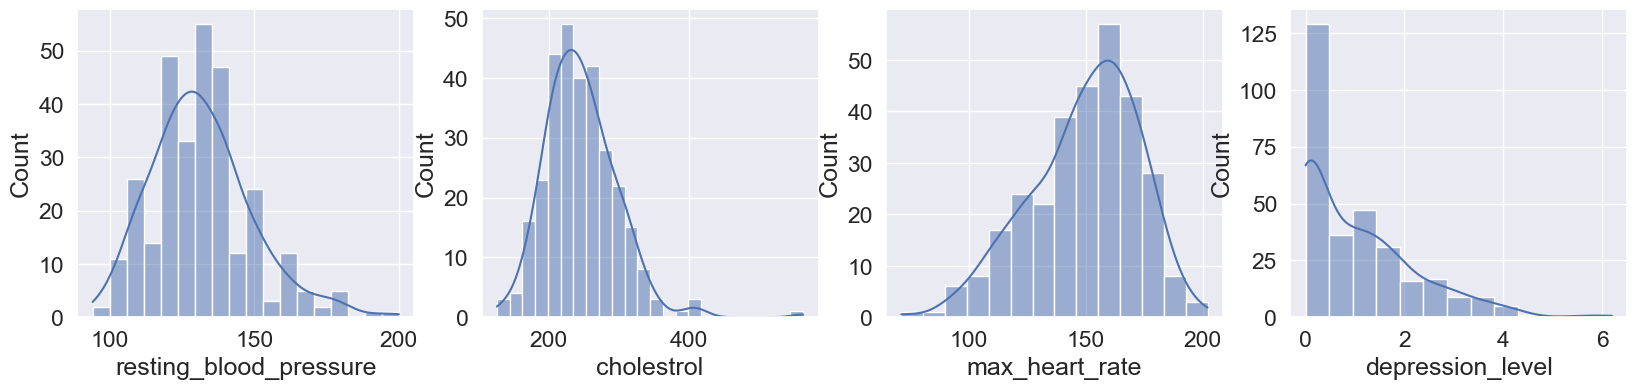

In [318]:
## examining the dataset based on plots
fig, axs = plt.subplots(1, 4, figsize=(20,4))

sns.histplot(df['resting_blood_pressure'], kde=True, ax=axs[0])
sns.histplot(df['cholestrol'], kde=True, ax=axs[1])
sns.histplot(df['max_heart_rate'], kde=True, ax=axs[2])
sns.histplot(df['depression_level'], kde=True, ax=axs[3])

plt.show()

Based on the plots generated, we can visualise the distribution of the dataset. Referencing the previous example, the 'cholestrol' column, we can indeed see that the graph is skewed to the right due to outliers.

The 'age' column is ignored as age is not necessarily indicative of a heart disease onset. Any outliers in this case may be meaningful data

The 'number_of_major_vessels' column is ignored as it contains discrete values with no natural order/scale which may yield meaningless results when assessing with techniques like Z-Scoring or the Interquartile Range (IQR) method

The IQR method is generally less sensitive to outliers and is more appropriate for data sets with non-normal distributions. Based on the above plots generated, the columns examined largely have normal distribution with a few outliers skewing the graphs. Meanwhile, the Z-Scoring method is largely used for data that follows a normal distribution. Hence, we have decided to utilise the Z-Scoring method to remove the outliers in our dataset

In [319]:
# removing outliers using the Z-Scoring method
# setting a threshold of 3 to assess the Z-Score againts
threshold = 3

# calculating the z_scores for the columns to assess
resting_blood_pressure_z_scores = np.abs(stats.zscore(df['resting_blood_pressure']))
cholestrol_z_scores = np.abs(stats.zscore(df['cholestrol']))
max_heart_rate_z_scores = np.abs(stats.zscore(df['max_heart_rate']))
depression_level_z_scores = np.abs(stats.zscore(df['depression_level']))

# aggregating the indices of the records that contain outliers 
outliers = np.where(resting_blood_pressure_z_scores > threshold) + np.where(cholestrol_z_scores > threshold) + np.where(max_heart_rate_z_scores > threshold) + np.where(depression_level_z_scores > threshold)

print(outliers)

(array([124, 142], dtype=int64), array([104, 128, 144, 260], dtype=int64), array([188], dtype=int64), array([51, 63], dtype=int64))


In [320]:
# dropping the records that contain outliers
i = 0
df_clean = df.copy()
while i < len(outliers):
    df_clean.drop(outliers[i], inplace=True)
    i += 1

# resetting the index of the DataFrame
df_clean.reset_index(drop=True, inplace=True)

df_clean

,age,sex,chest_pain_type,resting_blood_pressure,cholestrol,fasting_blood_sugar,resting_ecg,max_heart_rate,exercise_induced_angina,depression_level,peak_exercise_st_slope,number_of_major_vessels,thalassemia_disorder,have_heart_disease
0,52,Male,Typical Angina,125,212,<=120mg/dl,ST-T Wave Abnormality,168,No,1.0,Downsloping,2.0,Reversible Defect,Normal
1,53,Male,Typical Angina,140,203,>120mg/dl,Normal,155,Yes,3.1,Upsloping,0.0,Reversible Defect,Normal
2,70,Male,Typical Angina,145,174,<=120mg/dl,ST-T Wave Abnormality,125,Yes,2.6,Upsloping,0.0,Reversible Defect,Normal
3,61,Male,Typical Angina,148,203,<=120mg/dl,ST-T Wave Abnormality,161,No,0.0,Downsloping,1.0,Reversible Defect,Normal
4,62,Female,Typical Angina,138,294,>120mg/dl,ST-T Wave Abnormality,106,No,1.9,Flat,3.0,Normal Blood Flow,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
288,68,Female,Non-Anginal Pain,120,211,<=120mg/dl,Normal,115,No,1.5,Flat,0.0,Normal Blood Flow,Heart Disease
289,44,Female,Non-Anginal Pain,108,141,<=120mg/dl,ST-T Wave Abnormality,175,No,0.6,Flat,0.0,Normal Blood Flow,Heart Disease
290,52,Male,Typical Angina,128,255,<=120mg/dl,ST-T Wave Abnormality,161,Yes,0.0,Downsloping,1.0,Reversible Defect,Normal
291,59,Male,Asymptomatic,160,273,<=120mg/dl,Normal,125,No,0.0,Downsloping,0.0,Normal Blood Flow,Normal


Upon removing the outliers, we can then regenerate the plots to confirm if our dataset appears to be normally distributed

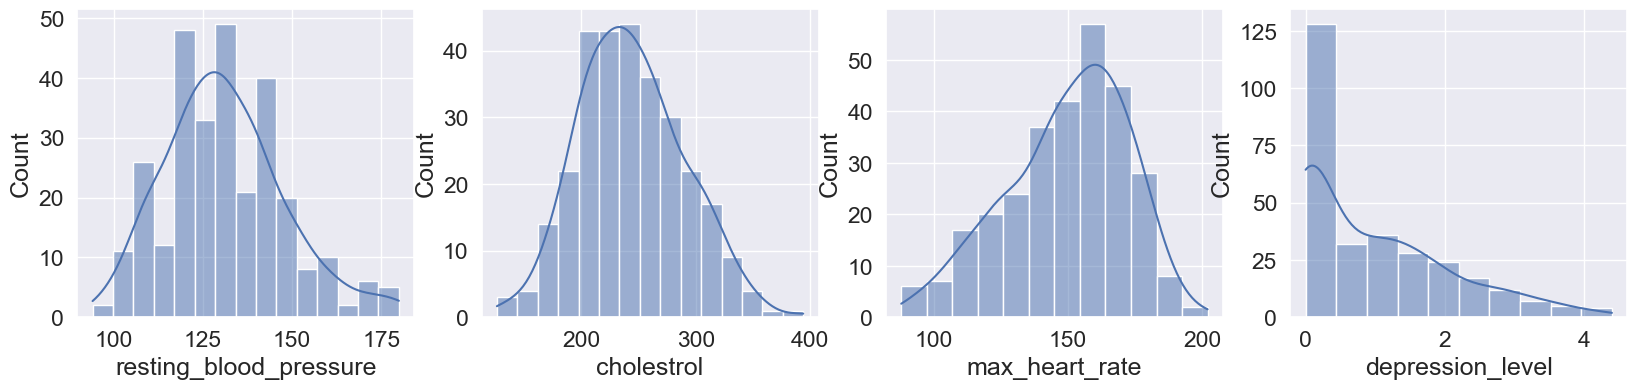

In [321]:
## regenerating the plots to check if cleaned data is more normally distributed
fig, axs = plt.subplots(1, 4, figsize=(20,4))

sns.histplot(df_clean['resting_blood_pressure'], kde=True, ax=axs[0])
sns.histplot(df_clean['cholestrol'], kde=True, ax=axs[1])
sns.histplot(df_clean['max_heart_rate'], kde=True, ax=axs[2])
sns.histplot(df_clean['depression_level'], kde=True, ax=axs[3])

plt.show()

We can see that the 'resting_blood_pressure', 'cholestrol' and 'max_heart_rate' plots do appear to be more normally distributed. The 'depression_level' plot however does not look significantly more normally distributed. This could be because of the small data size at hand which may not be indicative of the depression levels of the greater population of people who suffer heart diseases. Hence, no further processing is to be done on the 'depression_level' column

In [322]:
# view the cleaned DataFrame dimensions
df_clean.shape

(293, 14)

In [323]:
# getting info on the the cleaned DataFrame
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 293 entries, 0 to 292
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      293 non-null    int64  
 1   sex                      293 non-null    object 
 2   chest_pain_type          293 non-null    object 
 3   resting_blood_pressure   293 non-null    int64  
 4   cholestrol               293 non-null    int64  
 5   fasting_blood_sugar      293 non-null    object 
 6   resting_ecg              293 non-null    object 
 7   max_heart_rate           293 non-null    int64  
 8   exercise_induced_angina  293 non-null    object 
 9   depression_level         293 non-null    float64
 10  peak_exercise_st_slope   293 non-null    object 
 11  number_of_major_vessels  293 non-null    float64
 12  thalassemia_disorder     293 non-null    object 
 13  have_heart_disease       293 non-null    object 
dtypes: float64(2), int64(4), o

In [324]:
# describing the cleaned DataFrame
df_clean.describe()

,age,resting_blood_pressure,cholestrol,max_heart_rate,depression_level,number_of_major_vessels
count,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000
mean,54.232082,131.034130,243.880546,149.808874,0.989420,0.645051
std,9.078467,16.831931,45.755860,22.488604,1.076138,0.919882
min,29.000000,94.000000,126.000000,88.000000,0.000000,0.000000
25%,47.000000,120.000000,211.000000,134.000000,0.000000,0.000000
50%,55.000000,130.000000,240.000000,153.000000,0.600000,0.000000
75%,61.000000,140.000000,273.000000,166.000000,1.600000,1.000000
max,77.000000,180.000000,394.000000,202.000000,4.400000,3.000000
